In [2]:
import pandas as pd  # Librería para manejo de datos
import re  # Librería para expresiones regulares
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("../data/raw/scrapingIBM.xlsx", sheet_name='Datos')

In [4]:
df.head(10)

,REVIEW_TITLE,SCORE,ROLE,PROS,CONS,DATE,STATUS,LOCATION
0,Buena compañia,4,Project Manager,Mucha capacitacion opciones de crecimiento y p...,Largas jornadas de trabajo durante semana y fi...,2021-05-27,"Current Employee, more than 1 year","Monterrey, Nuevo León"
1,Una empresa que podría ser mejor con sus emple...,3,Técnico De Pruebas,"Buenas prestaciones, oportunidad de crecimiento.",Los puestos son heredados a amigos o conocidos...,2021-07-29,Current Employee,"El Salto, Jalisco"
2,buena experiencia buen trabajoa con salario po...,3,Analista Contable,flexibilidad horaria y trabajo desde casa iiii...,salario bajo,2017-06-20,Current Employee,Martínez
3,Buen lugar para trabajar,5,Offering Manager,"Buenas prestaciones, salario por encima del me...","Distancia de las oficinas, burocracia.",2019-08-08,"Current Employee, more than 5 years","Guadalajara, Jalisco"
4,Bien pero con incertidumbre,4,Programador Web,Muy buen ambiente de trabajo aprendí muchísimo,A cada rato hay recortes cada Q hay incertidum...,2019-09-23,"Former Employee, more than 5 years",NaN
5,IBM de México SA de CV,4,Program Manager,Buenas prestaciones laborales y manejo de tecn...,Falta de seguimiento a la carrera profesional ...,2019-11-21,"Former Employee, more than 8 years",NaN
6,"Muy grande, organización chica",3,Tester QA,"Perteneces a una gran empresa, pesos para el cv",Es tan grande que se escapa de las manos la or...,2019-12-05,Former Employee,Buenos Aires
7,IBM,4,H R Business Partner,"Acceso a una gran cantidad de conocimiento, ge...","Muchos procesos, complejidad, burocrática, top...",2019-12-10,"Current Employee, more than 10 years",NaN
8,Transformandose,3,Anonymous Employee,"Solida, con gran historia de reinvencion",Lenta y Mexico poco conectado con el mundo,2019-12-12,"Current Employee, more than 8 years",Ciudad de Mexico
9,Consultoria,4,Anonymous Employee,"Desarrollo profesional, activos de conocimient...","Alta burocracia, poco balance entre vida y tra...",2020-01-06,"Former Employee, more than 10 years",NaN


In [5]:
# Estadísticas descriptivas
descriptive_stats = df.describe()

descriptive_stats

,SCORE,DATE
count,3069.000000,3069
mean,3.993809,2021-08-22 06:12:04.926686208
min,1.000000,2015-05-26 00:00:00
25%,3.000000,2020-10-02 00:00:00
50%,4.000000,2022-01-14 00:00:00
75%,5.000000,2022-12-23 00:00:00
max,5.000000,2024-05-23 00:00:00
std,0.997533,NaN


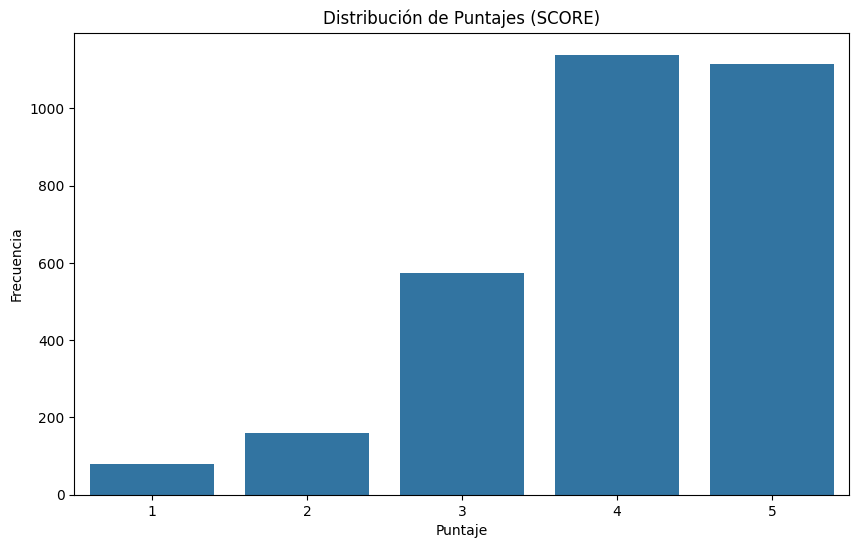

In [7]:
#Grafica 
plt.figure(figsize=(10, 6))
sns.countplot(x='SCORE', data=df)
plt.title('Distribución de Puntajes (SCORE)')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
# Estandarizar los valores de LOCATION y STATUS
df['LOCATION'] = df['LOCATION'].str.title()
df['STATUS'] = df['STATUS'].str.title()

# Mostrar el DataFrame limpio
df

,REVIEW_TITLE,SCORE,ROLE,PROS,CONS,DATE,STATUS,LOCATION
0,Buena compañia,4,Project Manager,Mucha capacitacion opciones de crecimiento y p...,Largas jornadas de trabajo durante semana y fi...,2021-05-27,"Current Employee, More Than 1 Year","Monterrey, Nuevo León"
1,Una empresa que podría ser mejor con sus emple...,3,Técnico De Pruebas,"Buenas prestaciones, oportunidad de crecimiento.",Los puestos son heredados a amigos o conocidos...,2021-07-29,Current Employee,"El Salto, Jalisco"
2,buena experiencia buen trabajoa con salario po...,3,Analista Contable,flexibilidad horaria y trabajo desde casa iiii...,salario bajo,2017-06-20,Current Employee,Martínez
3,Buen lugar para trabajar,5,Offering Manager,"Buenas prestaciones, salario por encima del me...","Distancia de las oficinas, burocracia.",2019-08-08,"Current Employee, More Than 5 Years","Guadalajara, Jalisco"
4,Bien pero con incertidumbre,4,Programador Web,Muy buen ambiente de trabajo aprendí muchísimo,A cada rato hay recortes cada Q hay incertidum...,2019-09-23,"Former Employee, More Than 5 Years",NaN
...,...,...,...,...,...,...,...,...
3064,Buena empresa para crecer,4,Test Engineer,Gran ambiente de trabajo con buena flexibilida...,El campus de Guadalajara está muy retirado de ...,2020-02-21,"Current Employee, More Than 1 Year","El Salto, Jalisco"
3065,Gran experiencia en multinacional,4,Senior Accounting Analyst,"Organización, ambiente relajado. Gran crecimie...",Al ser tan grande aveces se pierde la individu...,2020-03-16,"Former Employee, More Than 5 Years",Buenos Aires
3066,Esperaría algo mejor,3,Application Developer,"Constante aprendizaje, gente preparada, buenas...",Depende del proyecto en el que estés que tan b...,2020-05-26,"Current Employee, More Than 1 Year",Ciudad De Mexico
3067,"Buen ambiente laboral, empresa 100% recomendable",5,Account Manager,Planes de salud y mejoras en los beneficios gl...,"No mucho para comentar, el horario y no politi...",2020-07-17,"Current Employee, More Than 8 Years",Montevideo


In [10]:
from collections import Counter
import re

# Función para limpiar y contar palabras
def get_word_counts(column,  min_length=8):
    words = ' '.join(column).lower()
    words = re.sub(r'[^a-záéíóúüñ\s]', '', words)
    word_list = [word for word in words.split() if len(word) >= min_length]
    word_counts = Counter(word_list)
    return word_counts.most_common(10)

# Obtener las palabras más comunes en PROS y CONS
common_pros = get_word_counts(df['PROS'])
common_cons = get_word_counts(df['CONS'])


In [11]:
common_pros

[('ambiente', 711),
 ('prestaciones', 435),
 ('flexibilidad', 362),
 ('crecimiento', 329),
 ('excelente', 214),
 ('aprendizaje', 207),
 ('oportunidades', 203),
 ('beneficios', 176),
 ('trabajar', 175),
 ('posibilidad', 152)]

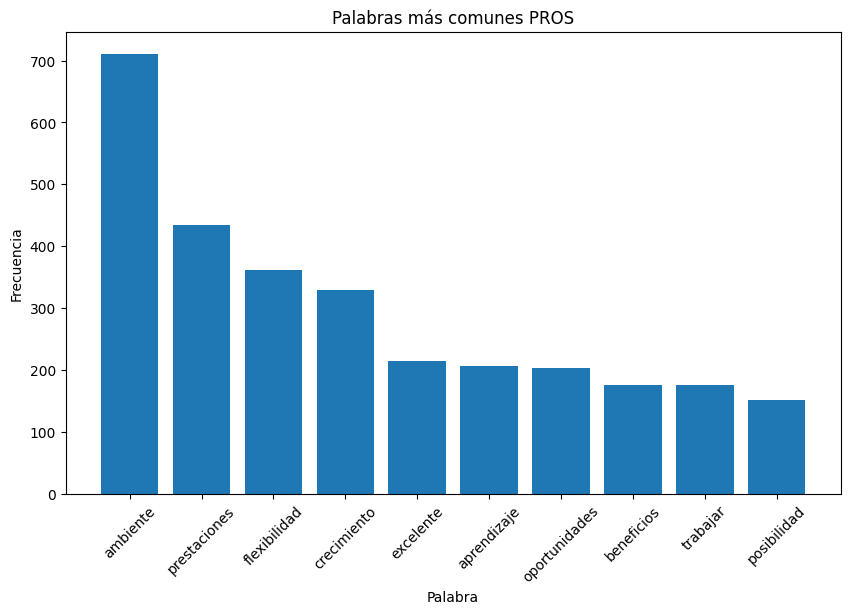

In [12]:
keys = [item[0] for item in common_pros]
values = [item[1] for item in common_pros]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(keys, values)
plt.title('Palabras más comunes PROS')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [15]:
common_cons

[('para', 523),
 ('empresa', 334),
 ('trabajo', 331),
 ('sueldo', 313),
 ('poco', 291),
 ('crecimiento', 274),
 ('sueldos', 247),
 ('bajo', 211),
 ('mucho', 190),
 ('mucha', 186)]

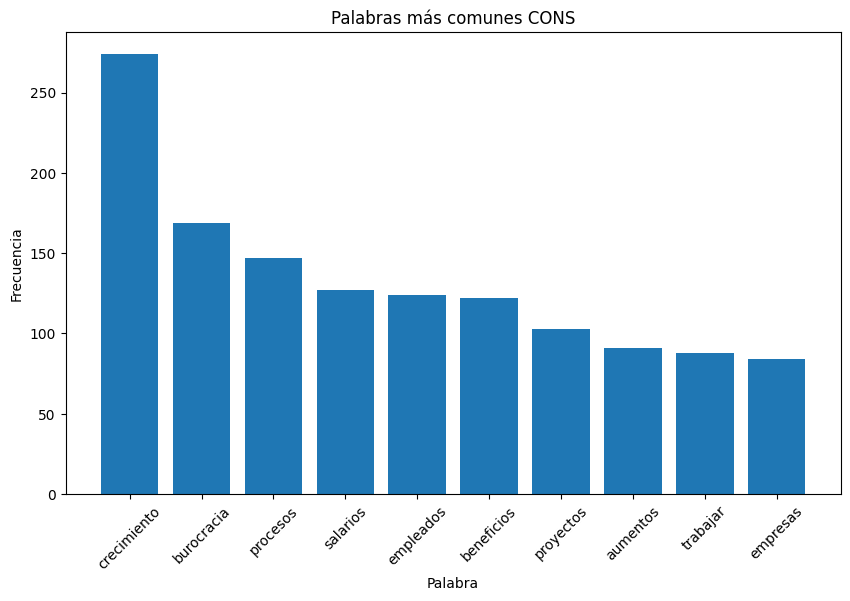

In [13]:
keys = [item[0] for item in common_cons]
values = [item[1] for item in common_cons]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(keys, values)
plt.title('Palabras más comunes CONS')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Contar valores únicos en cada columna
role_counts = df['ROLE'].value_counts()
role_counts

ROLE
Anonymous Employee                    276
Software Developer                     71
Project Manager                        69
Application Developer                  64
Business Analyst                       51
                                     ... 
IT Support Technician                   1
Software Tester Specialist              1
Administrative/Executive Assistant      1
Software Application Developer          1
Frontend                                1
Name: count, Length: 1166, dtype: int64

In [19]:
location_counts = df['LOCATION'].value_counts()
location_counts

LOCATION
Unknown                 867
Buenos Aires            642
Guadalajara, Jalisco    524
Ciudad De Mexico        297
Madrid                  111
                       ... 
Argentina                 1
Madridejos                1
Brno                      1
Cancún                    1
Mexicali                  1
Name: count, Length: 116, dtype: int64

In [18]:
status_counts = df['STATUS'].value_counts()
status_counts

STATUS
Current Employee                        1143
Current Employee, More Than 1 Year       352
Former Employee                          325
Current Employee, Less Than 1 Year       214
Current Employee, More Than 3 Years      212
Former Employee, More Than 1 Year        153
Current Employee, More Than 5 Years      130
Former Employee, More Than 3 Years       107
Former Employee, Less Than 1 Year         92
Current Employee, More Than 10 Years      89
Current Employee, More Than 8 Years       86
Former Employee, More Than 5 Years        58
Former Employee, More Than 10 Years       49
Former Employee, More Than 8 Years        47
Former Employee, More Than 2 Years         6
Former Employee, More Than 6 Years         3
Former Employee, More Than 9 Years         2
Former Employee, More Than 7 Years         1
Name: count, dtype: int64